<a href="https://colab.research.google.com/github/Gaurav1401/Deep-Learning/blob/main/CNN/MNIST/CNN_on_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist # it is a grayscale dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

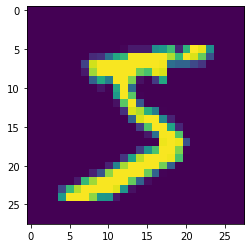

In [7]:
plt.imshow(single_image)

In [8]:
y_train[0]

5

**Here, we can confirm that the first image is of digit 5**

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Here, we are trying to predict the image, but the target variable can be considered as a continuous variable, so or model can also give 5.5 or any other such number as the output. We need to tell it that it is a kind of classification model**

**We need to do the one hot encoding of the target column**

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example.shape

(60000, 10)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Here, we can clearly see that, at the index 5 it is showing the value of 1 as a result of One Hot Encoding**

In [15]:
y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, num_classes = 10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255
x_test = x_test/255

In [19]:
scaled_image = x_train[0]

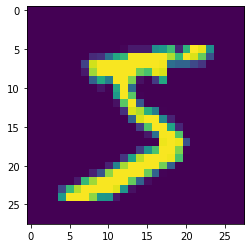

In [20]:
plt.imshow(scaled_image)

In [21]:
x_test.shape

(10000, 28, 28)

In [22]:
# batch-size, width, height, color_channels
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [23]:
from tensorflow.keras.models import Sequential

In [24]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#Output Layer Softmax --> MultiClass
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam',
              metrics = ['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor='val_loss', patience = 1)

In [28]:
model.fit(x_train, y_cat_train, epochs = 10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 36s 3ms/step - loss: 0.1415 - accuracy: 0.9579 - val_loss: 0.0522 - val_accuracy: 0.9821
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0413 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0418 - val_accuracy: 0.9877


In [29]:
metrics = pd.DataFrame(model.history.history)

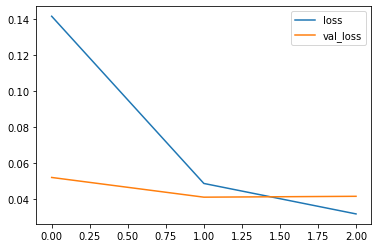

In [30]:
metrics[['loss', 'val_loss']].plot()

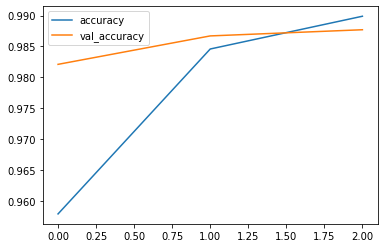

In [34]:
metrics[['accuracy', 'val_accuracy']].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.04176222160458565, 0.9876999855041504]

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

In [41]:
y_cat_test.shape

(10000, 10)

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.99      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [43]:
confusion_matrix(y_test, predictions)

array([[ 973,    1,    0,    2,    0,    0,    2,    0,    1,    1],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    3, 1018,    4,    1,    0,    0,    2,    3,    0],
       [   0,    0,    1, 1006,    0,    1,    0,    0,    2,    0],
       [   0,    1,    0,    0,  975,    0,    3,    0,    0,    3],
       [   2,    1,    0,   15,    0,  868,    2,    0,    2,    2],
       [   2,    2,    0,    1,    2,    2,  946,    0,    3,    0],
       [   1,    2,    7,    3,    0,    0,    0, 1009,    1,    5],
       [   4,    1,    1,    2,    0,    0,    1,    2,  959,    4],
       [   1,    2,    0,    6,    8,    2,    0,    1,    0,  989]])